In [25]:
%pip install tensorflow
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import random

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
random.seed(42)
tf.random.set_seed(42)
np.random.seed(42)

In [27]:
##uint 8 255 values again
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], shape=(50000, 1), dtype=uint8)

In [28]:
## Preprocessing of data
X_train = X_train[0:5000] 
Y_train = Y_train[0:5000] 
X_test = X_test[0:1000]
Y_test = Y_test[0:1000]

## Normalization of data
X_train, X_test = X_train / 255.0, X_test / 255.0 

## Flatten the data
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))

##First hidden layer
model.add(Dense(256, activation='elu', kernel_initializer='he_normal'))
## Second Hidden layer
model.add(Dense(256, activation='elu', kernel_initializer='he_normal'))
## Third hidden layer
model.add(Dense(256, activation='elu', kernel_initializer='he_normal'))
## Output layer
model.add(Dense(10, activation='softmax'))

## modell fitting values
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

nadam_optimizer = Nadam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=nadam_optimizer,metrics=['accuracy'])
history = model.fit(X_train, Y_train,epochs=50, callbacks=early_stopping, batch_size=128, validation_split=0.2)


Epoch 1/50


/Users/daviddevoldpearson/take-2-ML-3/.venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1717 - loss: 3.2171 - val_accuracy: 0.2210 - val_loss: 2.1314
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2937 - loss: 1.9665 - val_accuracy: 0.2860 - val_loss: 1.9761
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3365 - loss: 1.8554 - val_accuracy: 0.3150 - val_loss: 1.9288
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3675 - loss: 1.7806 - val_accuracy: 0.3430 - val_loss: 1.9009
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3835 - loss: 1.7250 - val_accuracy: 0.3430 - val_loss: 1.8814
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4053 - loss: 1.6691 - val_accuracy: 0.3550 - val_loss: 1.8791
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4248 - loss: 1.6117 - val_accuracy: 0.3660 - val_loss: 1.8686
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4465 - loss: 1.5553 - val_accuracy: 0.3700 - val_loss: 1.8643
Epo

In [ ]:
test_accuracy = model.evaluate(X_test, Y_test, batch_size=32)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3960 - loss: 1.7400


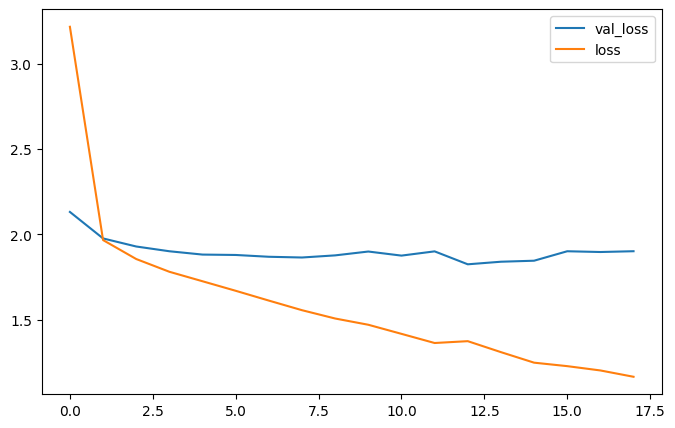

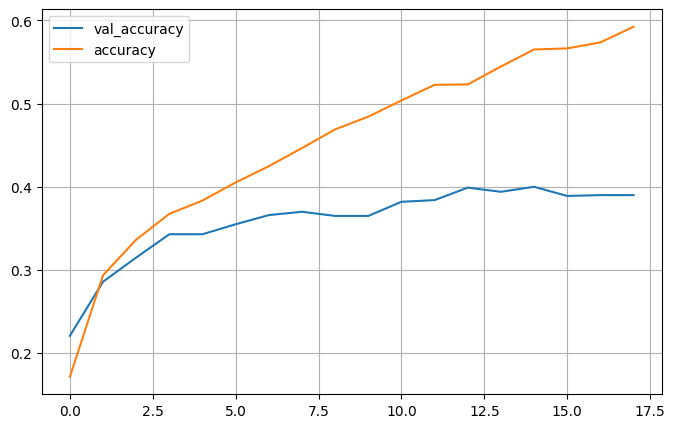

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.DataFrame(history.history)
dataframe[['val_loss', 'loss']].plot(figsize=(8,5))
dataframe[['val_accuracy', 'accuracy']].plot(figsize=(8,5))
plt.grid(True)
plt.show()